#  This is Lab 1 executable file
This file contains the program code that is the solution to the tasks from the file [lab_1_task.txt](https://github.com/vandosik/M-M-MSA/blob/master/Lab_1/lab_1_task.txt).
## Authors
* Ivan Dubinin: [vandosik](https://github.com/vandosik)
* Alexey Grandilevskii: [zer0deck](https://github.com/zer0deck)
* Mikhail Sorokin: [Mikha1lSorokin](https://github.com/Mikha1lSorokin)

In [307]:
# libs initialization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit 
import seaborn as sns

In [308]:
# Dataset initialization
path_to_file = '../Datasets/GameStats.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.head(5)

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,520,30,False,1.579998,150,0.0
1,9/7/2019 2:44:46 PM,520,30,False,3.805001,100,0.0
2,9/7/2019 2:59:20 PM,520,30,False,1.783006,50,0.0
3,9/7/2019 2:59:28 PM,520,30,True,0.263020,0,0.0
4,9/7/2019 2:59:48 PM,520,30,True,3.318019,50,0.0


Date:        date and time the game was auto-played

Level:       the 3-digit number is an estimate of the difficulty from a previous run

NumBlocks:   how many blocks have to be broken to win the level

IsWin:       True if autoplay broke all the blocks, False if the ball fell past the paddle

ElapsedTime: Seconds until either won or lost (game is played at 4x speed, so multiply by 4 to get an estimate of how long a human might play it)

Score:       total score when the game was won or lost

Accuracy:    the autoplay is tuned with a randomly-chosen accuracy. Higher numbers are more likely to win;

In [309]:
# Select column

# col_names = ['Date',	'Level',	'NumBlocks',	'IsWin',	'ElapsedTime',	'Score',	'Accuracy']
col_names = list(source_df.columns)

col_name = col_names[4]

In [310]:
# Remove outliers
if True: # one way
    q_low = source_df[col_name].quantile(0.005)
    q_hi  = source_df[col_name].quantile(0.995)

    source_df = source_df[(source_df[col_name] < q_hi) & (source_df[col_name] > q_low)]
else: # other way
    source_df[(np.abs(scipy.stats.zscore(source_df)) < 3).all(axis=1)]

Text(0, 0.5, 'Column val')

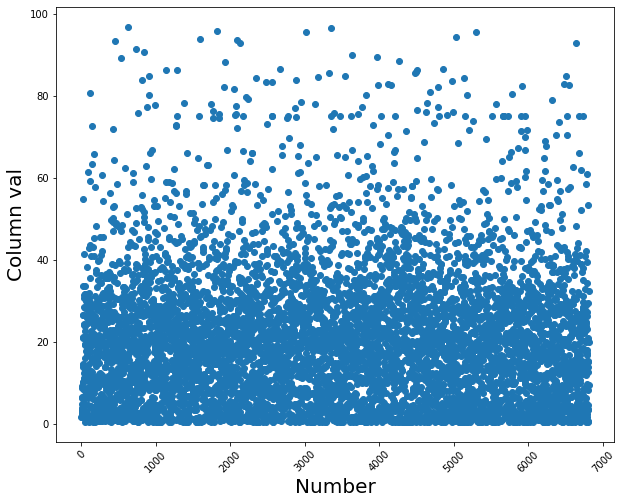

In [311]:
# Display our data
plt.figure(figsize=(10, 8))

plt.scatter(source_df.index, source_df[col_name])
plt.xticks(rotation=45)

plt.xlabel(u'Number', fontsize = 20)
plt.ylabel(u'Column val', fontsize = 20)

No handles with labels found to put in legend.


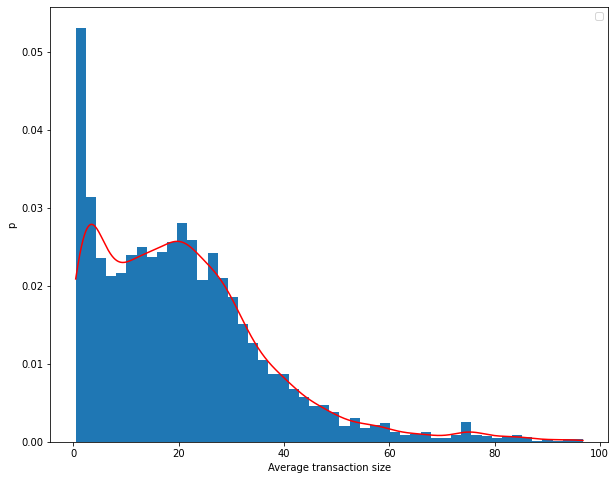

In [312]:
#Plotting a histogram and kernel density estimate
plt.figure(figsize=(10, 8))

kernel = scipy.stats.gaussian_kde(source_df[col_name])

min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
x = np.linspace(min_amount, max_amount, len(source_df)) # by defaul 50 items
kde_values = kernel(x)

# sns.histplot(source_df[col_name], kde=False, stat="density", label=f'Average transaction size in rubles')
# Draw unnormed histogramm
hist_data = plt.hist(source_df[col_name], density=True, bins=50)

# print(hist_vals)
plt.plot(x, kde_values, color="r")

plt.ylabel('p')
plt.xlabel('Average transaction size')

plt.legend()
plt.show()

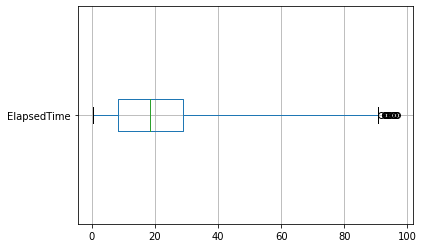

In [313]:
# Calculation of sample mean, variance, standard deviation, median
mean = source_df[col_name].mean()
var = source_df[col_name].var()
std = source_df[col_name].std()
median = source_df[col_name].median()
# Box plot
boxplot = source_df.boxplot(column=[col_name], whis=3., vert=False) # defaul whis is 1.5 (to many outliers there)

# boxplot = source_df.boxplot(column=['Accuracy'])

(0.5767237729403706, -7.727217595237672, 24.294444013023607)
[  0.3968775  -24.91969518  38.86539792]


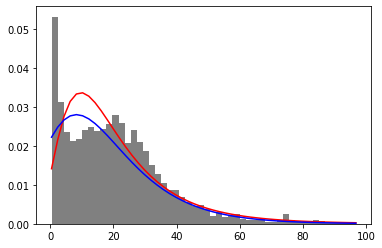

In [382]:
# Determination of the parameters of the lognormal distribution 

hist_data = plt.hist(source_df[col_name], density=True, bins=50, color='grey')
x = np.linspace(min_amount, max_amount)

# The distribution parameters are determined using the fit function based on the maximum likelihood method
params = scipy.stats.lognorm.fit(source_df[col_name])
print(params)
pdf_mle = scipy.stats.lognorm.pdf(x, *params)

plt.plot(x, pdf_mle, color='r')

#  The distribution parameters are determined using the fit function based on least squares method
def lognorm_fit(arg_x, s, loc, scale):
    # print(scipy.stats.lognorm.pdf(arg_x, s, loc, scale))
    return scipy.stats.lognorm.pdf(arg_x, s, loc, scale)

hist_bins = hist_data[1][:-1]  # remove last element
delta = hist_bins[1]-hist_bins[0]
hist_bins += delta / 2 # Take centres of bins
# print(hist_bins)
hist_vals = hist_data[0] # Get the height of bins for least squares
# print(hist_vals)


lst_sq_res = curve_fit(lognorm_fit, hist_bins, hist_vals, [5., 5., 5.])
print(lst_sq_res[0])
pdf_lsm = scipy.stats.lognorm.pdf(x, lst_sq_res[0][0], lst_sq_res[0][1], lst_sq_res[0][2])
plt.plot(x, pdf_lsm, color='b')


In [315]:
# Print Gained distribs by MLE and LSE



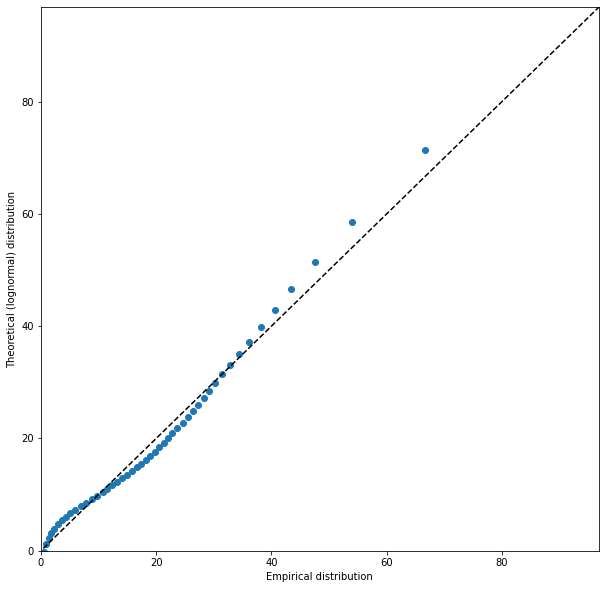

In [316]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 50)
qn_first = np.percentile(source_df[col_name], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, np.max(source_df[col_name]))
plt.ylim(0, np.max(source_df[col_name]))
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()

In [317]:
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = scipy.stats.kstest(source_df[col_name], 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(source_df[col_name])
print(ks)
print(chi2)

KstestResult(statistic=0.057300381066930584, pvalue=1.0914561937087381e-19)
Power_divergenceResult(statistic=85364.275211095, pvalue=0.0)
